# Задача 9. Сравнение методов регрессии

** **Дедлайн**: 28.11.2025, 23:59
* Полный балл: 20

## Задача

- [+] Найти данные, на которых интересно будет решать задачу регрессии (больше `1000` строк, больше `5` признаков).
- [+] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [+] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
- [+] При необходимости выполнить полезные преобразования данных (например, трансформировать категориальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [+] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания для библиотечных реализаций (например, из **sklearn**) четырёх регрессионных методов.
- [+] Сравнить все обученные модели с точки зрения времени обучения/предсказания и результирующей точности. Сделать выводы о полученных моделях в рамках решения задачи регрессии на выбранных данных.

## Часть 1.
- Поиск данных

Я нашел датасет, который на основе харктеристик района предсказывает цены на жилье.
### Описание датасета
- Avg. Area Income - Средний годовой доход домохозяйств в данном географическом районе (в долларах)
- Avg. Area House Age - Средний возраст домов в районе (в годах)
- Avg. Area Number of Rooms - Среднее количество комнат в домах района
- Avg. Area Number of Bedrooms - Среднее количество спален в домах района
- Area Population - Общая численность населения в географическом районе
- Price - Цена дома (целевая переменная для прогнозирования) (в долларах)
- Address - Физический адрес дома

Загружаем наш датасет

In [27]:
import pandas as pd

df = pd.read_csv("housing.csv")

print(f"Размер: {df.shape}")
print(df[:6])


Размер: (5000, 7)
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   
5      80175.754159             4.988408                   6.104512   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   
5                          4.04     26748.428425  1.068138e+06   

                     

## Часть 2
### Выполняем чистку (убираем дубликаты)

In [28]:
duplicates = df.duplicated().sum()
print(f"Найдено дубликатов: {duplicates}")

Найдено дубликатов: 0


### Выполняем проверку на пропуски

In [29]:
missing_data = df.isnull().sum()
print(f"Найдено пропусков: \n{missing_data}")

Найдено пропусков: 
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


### Видим, что пропусков и дубликатов не найдено.

## Часть 3
### Убираем ненужные признаки
#### Я убираю адрес дома, так как его использовать бессмысленно, так как адрес никак не влияет на стоимость дома в нашем случае(уже есть все данные про район), и он не пригодится при регрессии

In [30]:
df = df[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population", "Price"]]
print(f"Размер: {df.shape}")
print(df[:5])

Размер: (5000, 6)
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09     23086.800503  1.059034e+06  
1                          3.09     40173.072174  1.505891e+06  
2                          5.13     36882.159400  1.058988e+06  
3                          3.26     34310.242831  1.260617e+06  
4                          4.23     26354.109472  6.309435e+05  


#### У нас получается ровно 5 признаков и 5000 строк

## Часть 4
### Выполняем разведочный анализ (**EDA**), использовав визуализацию, и делаем выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.

#### Я построю графики распределения всех признаков и зависимость цен на дом от всех признаков

##### Графики распределения

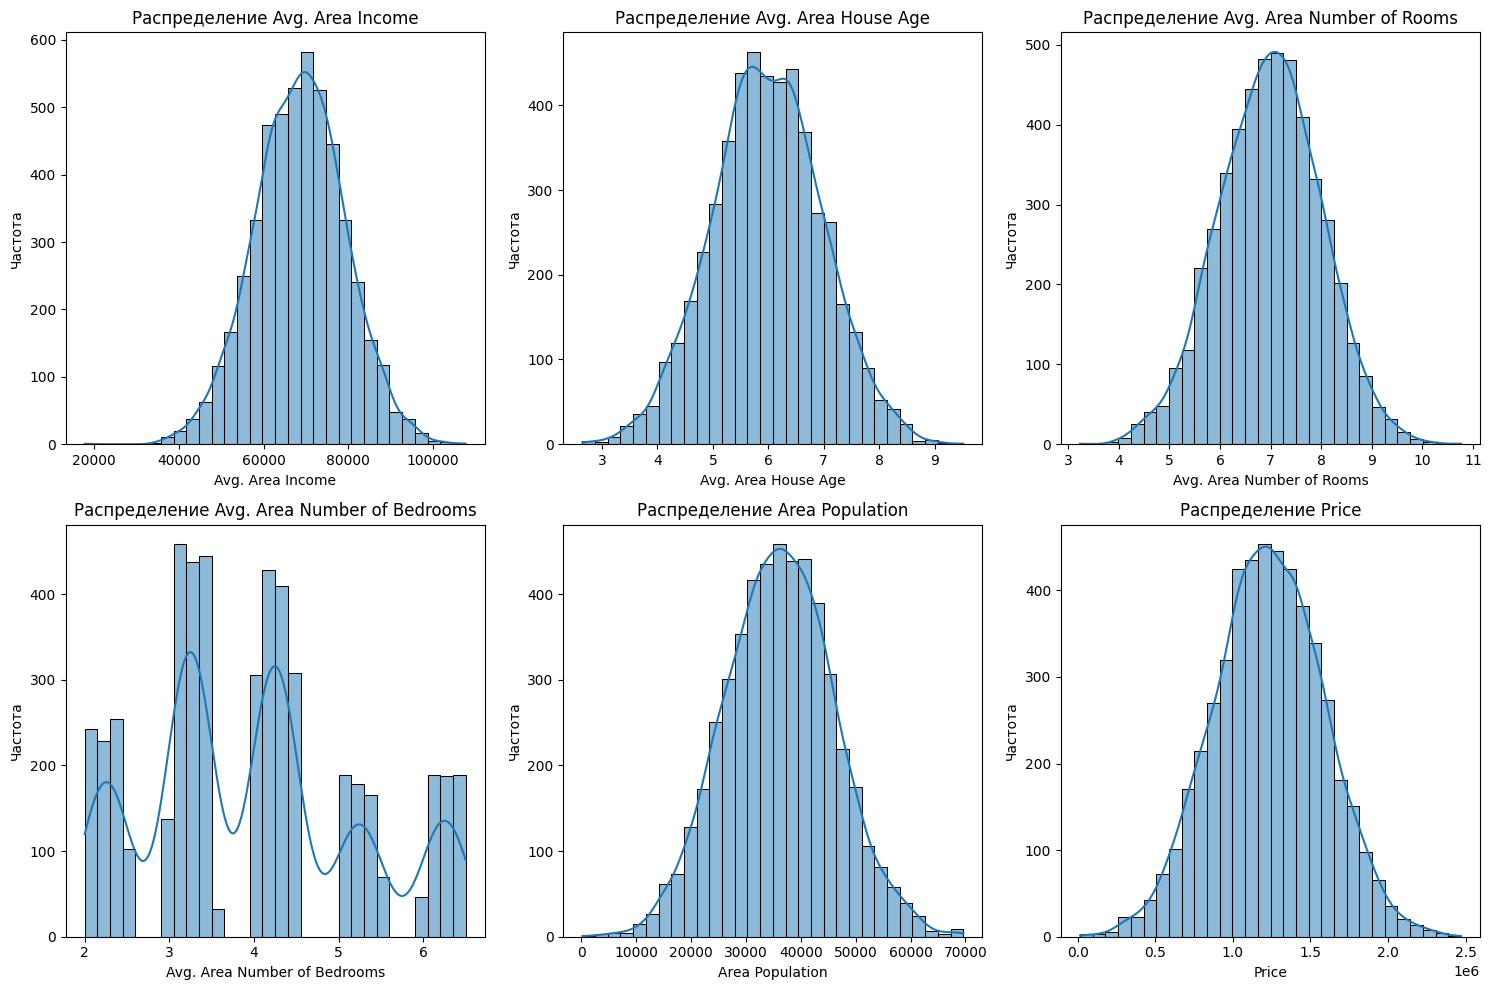

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем одну фигуру с несколькими subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 строки, 3 столбца

# Выбираем числовые колонки
columns = df.columns.to_list()

# Строим гистограммы для каждой колонки
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.histplot(df[column], kde=True, bins=30, ax=axes[row, col])
    axes[row, col].set_title(f'Распределение {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Частота')

plt.tight_layout()
plt.show()



##### графики зависимости цен домов от признаков

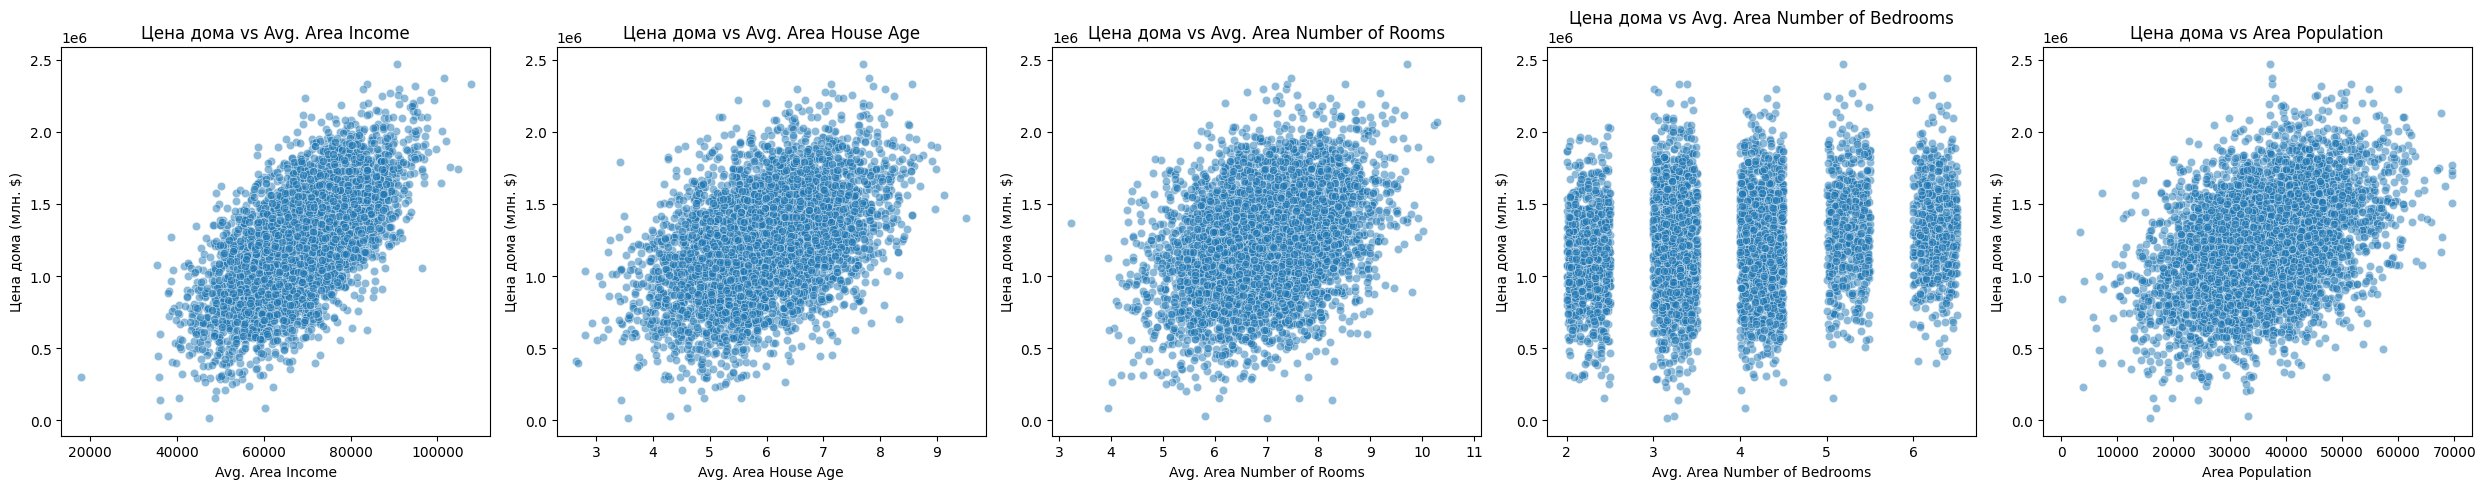

In [32]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# Строим графики через цикл
for i, feature in enumerate(columns[:5]):
    sns.scatterplot(x=df[feature], y=df[columns[5]], data=df, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Цена дома vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Цена дома (млн. $)')

plt.tight_layout()
plt.show()

### Выводы:
- Мы можем заметить, что чем больше население района, тем больше средняя цена на дом
- Тоже самое можно сказать и про средний возраст дома, хотя это странно
- Про количество комнат можем тоже утверждать, что чем больше комнат, тем больше стоимость дома, но это не сильно выделяется на графике
- Видно, что от количества спален не зависит стоимость дома
- Также мы четко видим, чем больше среднегодовой заработок в районе, тем больше там стоят дома

## Часть 5
### Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания для библиотечных реализаций (например, из **sklearn**) четырёх регрессионных методов.
#### Я буду использовать такие методы регрессии:
- RandomForestRegressor
- Linear Regression
- KNeighborsRegressor
- Ridge
#### Также буду использовать:
- GridSearchCV для поиска лучших параметров для каждого метода
- KFold для кросс - валидации
- StandardScaler для масштабирования

#### Сначала разделяем на тестовую и тренировочную выборки

In [33]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:5].tolist()]
Y = df["Price"]
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [34]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Масштабируем данные
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)


# cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)


# Создаем модели
rf = RandomForestRegressor(random_state=42)
lr = LinearRegression()
kr = KNeighborsRegressor()
rg = Ridge(random_state=42)


# создаем их параметры
lr_params = {
    'fit_intercept': [True, False]
}


rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

kr_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

rg_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid_lr = GridSearchCV(lr, lr_params, cv=cv, scoring="r2", n_jobs=-1).fit(X_train_scaled, Y_train) # Обучаем на масштабированных данных, так как в линейной регрессии это будет лучше, чем не масштабировать
grid_kr = GridSearchCV(kr, kr_params, cv=cv, scoring="r2", n_jobs=-1).fit(X_train_scaled, Y_train) # Тоже есть смысл масштабировать
grid_rf = GridSearchCV(rf, rf_params, cv=cv, scoring="r2", n_jobs=-1).fit(X_train, Y_train) # Нет смысла масштабировать данные 
grid_rg = GridSearchCV(rg, rg_params, cv=cv, scoring="r2", n_jobs=-1).fit(X_train_scaled, Y_train) # Обязательно масштабируем



#### Мы обучили модели, теперь надо посмотреть их метрики качества и лучшие параметры

In [38]:
Y_pred_lr = grid_lr.predict(X_test_scaled)
Y_pred_kr = grid_kr.predict(X_test_scaled)
Y_pred_rf = grid_rf.predict(X_test)
Y_pred_rg = grid_rg.predict(X_test_scaled)

models = {
    "RandomForestRegressor" : {
        "best_params":  grid_rf.best_params_,
        "r2_score" : r2_score(Y_test, Y_pred_rf),
        "MAE" : mean_absolute_error(Y_test, Y_pred_rf)* 1/(len(X_test_scaled)),
        "RMSE": (mean_squared_error(Y_test, Y_pred_rf))**0.5 * 1/(len(X_test_scaled)),
        "MAPE": mean_absolute_percentage_error(Y_test, Y_pred_rf)
    },
    "LinearRegression" : {
        "best_params":  grid_lr.best_params_,
        "r2_score" : r2_score(Y_test, Y_pred_lr),
        "MAE" : mean_absolute_error(Y_test, Y_pred_lr)* 1/(len(X_test_scaled)),
        "RMSE": (mean_squared_error(Y_test, Y_pred_lr))**0.5 * 1/(len(X_test_scaled)),
        "MAPE": mean_absolute_percentage_error(Y_test, Y_pred_lr)
    },
    "KNeighborsRegressor" : {
        "best_params":  grid_kr.best_params_,
        "r2_score" : r2_score(Y_test, Y_pred_kr),
        "MAE" : mean_absolute_error(Y_test, Y_pred_kr)* 1/(len(X_test_scaled)),
        "RMSE": (mean_squared_error(Y_test, Y_pred_kr))**0.5 * 1/(len(X_test_scaled)),
        "MAPE": mean_absolute_percentage_error(Y_test, Y_pred_kr)
    },
    "Ridge" : {
        "best_params":  grid_rg.best_params_,
        "r2_score" : r2_score(Y_test, Y_pred_rg),
        "MAE" : mean_absolute_error(Y_test, Y_pred_rg) * 1/(len(X_test_scaled)),
        "RMSE": (mean_squared_error(Y_test, Y_pred_rg))**0.5 * 1/(len(X_test_scaled)),
        "MAPE": mean_absolute_percentage_error(Y_test, Y_pred_rg)
    }
}

for model_name, metrics in models.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")




RandomForestRegressor:
  best_params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  r2_score: 0.8833141309678149
  MAE: 94.18632812072927
  RMSE: 119.81714726519218
  MAPE: 0.08898583715730786

LinearRegression:
  best_params: {'fit_intercept': True}
  r2_score: 0.9179971706834331
  MAE: 80.87909723489445
  RMSE: 100.44406055558481
  MAPE: 0.07387838859754366

KNeighborsRegressor:
  best_params: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
  r2_score: 0.8769926853945117
  MAE: 97.96310341243681
  RMSE: 123.01988350897906
  MAPE: 0.0924368069293838

Ridge:
  best_params: {'alpha': 1.0}
  r2_score: 0.9179972203628644
  MAE: 80.87776303977019
  RMSE: 100.44403012977763
  MAPE: 0.07388252845113959


## Часть 6
### Выводы
#### RandomForestRegressor
 - R² = 0.883 - объясняет 88.3% по признакам (худший показатель)
 - RMSE = 119.82 - почти худший показатель средней ошибки
 - MAE = 94.19 - тоже почти худший показатель из всех моделей
 - MAPE = 8.9% - процент ошибки значительно выше лидеров

#### LinearRegression
 - ² = 0.918 - максимальная объясняющая способность
 - RMSE = 100.44 - одна из минимальных ошибок
 - MAE = 80.88 - самая низкая средняя ошибка
 - MAPE = 7.39% - лучший процент точности

#### KNeighborsRegressor
 - R² = 0.877 - наихудшая объясняющая способность
 - RMSE = 123.02 - максимальная ошибка предсказания
 - MAE = 97.96 - наибольшая средняя ошибка
 - MAPE = 9.24% - наихудший процент точности

#### Ridge
 - R² = 0.918 - максимальная объясняющая способность
 - RMSE = 100.44 - абсолютно минимальная ошибка
 - MAE = 80.88 - абсолютно минимальная средняя ошибка
 - MAPE = 7.39% - лучший процент точности

## Итоговый вывод
- Ridge - абсолютный победитель в этом соревновании! Он абсолютный победитель! Для пресказания цены ипсользовал бы его.